In [3]:
year="2018"
month="8"
day="28"
hour="12"


data = sqlContext.read.json("/data/year="+year+"/month="+month+"/day="+day+"/hour="+hour+"/dump.json")

In [4]:
data = data.filter(data['origin'] == 'packet_logger').filter(data['protocol'] == 'tcp').orderBy('timestamp')

data.show()

+--------+------------+--------+--------+-------------+------------+-------------------+--------+--------+--------+---------+-------------------+----+-----+---+----+
|duration|ingress_port|  ip_dst|  ip_src|       origin|packet_count|       period_start|port_dst|port_src|protocol|switch_id|          timestamp|year|month|day|hour|
+--------+------------+--------+--------+-------------+------------+-------------------+--------+--------+--------+---------+-------------------+----+-----+---+----+
|    null|           2|10.0.0.1|10.0.0.2|packet_logger|        null|1.535451154263498E9|    9999|   57656|     tcp|        4|1.535451515160654E9|2018|    8| 28|  12|
|    null|           2|10.0.0.1|10.0.0.2|packet_logger|        null|1.535451154263498E9|    9999|   57656|     tcp|        4|1.535451515161638E9|2018|    8| 28|  12|
|    null|           2|10.0.0.1|10.0.0.2|packet_logger|        null|1.535451154263498E9|    9999|   57656|     tcp|        4|1.535451515162413E9|2018|    8| 28|  12|
|   

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
import sys
import pandas as pd
import matplotlib

In [6]:
bySwitch = data.groupBy('switch_id').count()

bySwitch.show()

+---------+-----+
|switch_id|count|
+---------+-----+
|        1|   39|
|        4|   37|
+---------+-----+



<IPython.core.display.Javascript object>


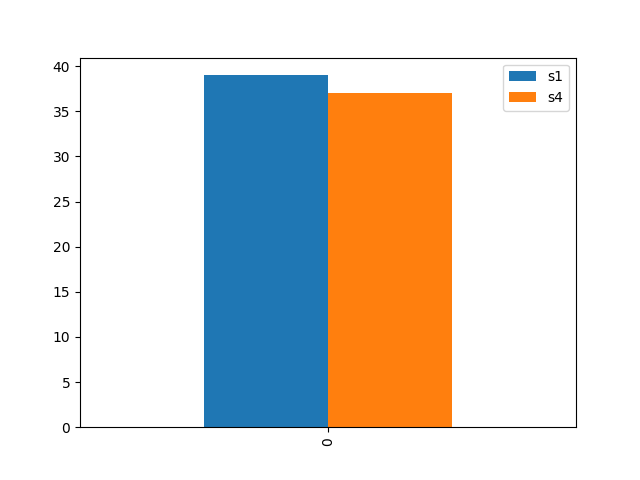

In [7]:
s1 = [row['count'] for row in bySwitch.filter(bySwitch['switch_id'] == 1).select('count').collect()]
s4 = [row['count'] for row in bySwitch.filter(bySwitch['switch_id'] == 4).select('count').collect()]


df = pd.DataFrame(data={ 's1': s1, 's4': s4 }, columns=['s1', 's4'])

df.plot(kind="bar")

In [8]:
bySource = data.groupBy('ip_src').count()

bySource.show()

+--------+-----+
|  ip_src|count|
+--------+-----+
|10.0.0.1|   40|
|10.0.0.2|   36|
+--------+-----+



<IPython.core.display.Javascript object>


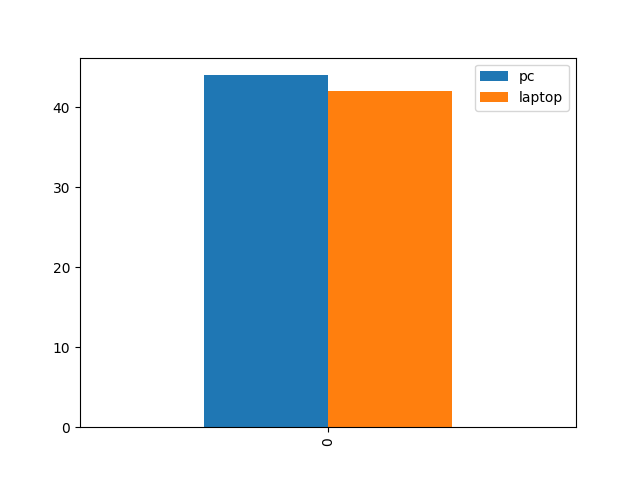

In [21]:
laptop = [row['count'] for row in bySource.filter(bySource['ip_src'] == '10.0.0.1').select('count').collect()]
pc = [row['count'] for row in bySource.filter(bySource['ip_src'] == '10.0.0.2').select('count').collect()]


df = pd.DataFrame(data={ 'pc': pc, 'laptop': laptop }, columns=['pc', 'laptop'])

df.plot(kind="bar")